2024-02-20 12:00:00: Altezza Marea: 0.034 metri
2024-02-20 12:30:00: Altezza Marea: 0.041 metri
2024-02-20 13:00:00: Altezza Marea: 0.043 metri
2024-02-20 13:30:00: Altezza Marea: 0.042 metri
2024-02-20 14:00:00: Altezza Marea: 0.038 metri
2024-02-20 14:30:00: Altezza Marea: 0.03 metri
2024-02-20 15:00:00: Altezza Marea: 0.02 metri
2024-02-20 15:30:00: Altezza Marea: 0.008 metri
2024-02-20 16:00:00: Altezza Marea: -0.005 metri
2024-02-20 16:30:00: Altezza Marea: -0.018 metri
2024-02-20 17:00:00: Altezza Marea: -0.03 metri
2024-02-20 17:30:00: Altezza Marea: -0.04 metri
2024-02-20 18:00:00: Altezza Marea: -0.047 metri
2024-02-20 18:30:00: Altezza Marea: -0.051 metri
2024-02-20 19:00:00: Altezza Marea: -0.051 metri
2024-02-20 19:30:00: Altezza Marea: -0.047 metri
2024-02-20 20:00:00: Altezza Marea: -0.04 metri
2024-02-20 20:30:00: Altezza Marea: -0.029 metri
2024-02-20 21:00:00: Altezza Marea: -0.015 metri
2024-02-20 21:30:00: Altezza Marea: 0.001 metri
2024-02-20 22:00:00: Altezza Marea

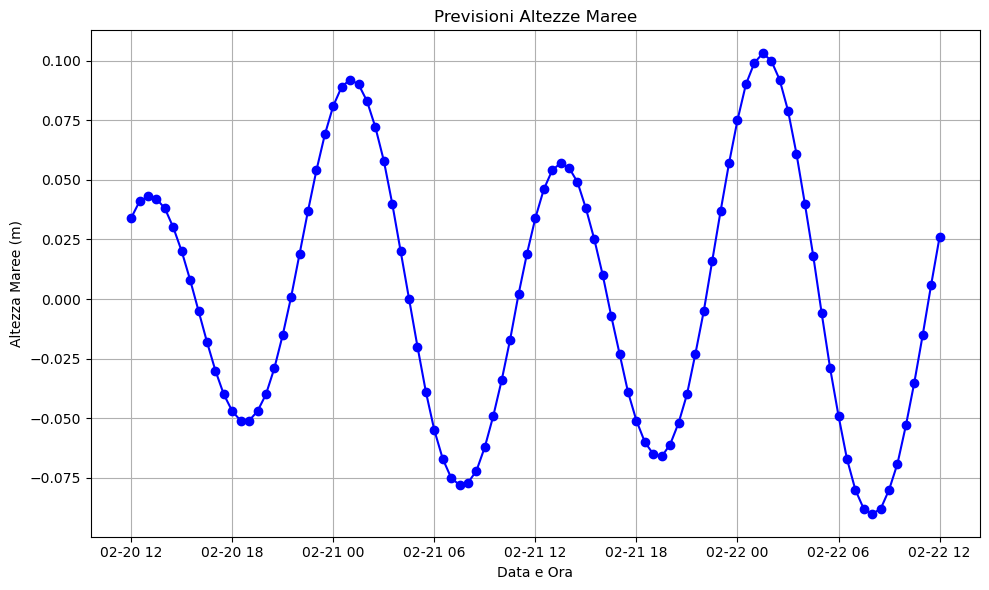

In [7]:
from datetime import datetime
import requests
import matplotlib.pyplot as plt
import csv

def ottieni_previsioni_maree(latitudine, longitudine, data_inizio):
    chiave_api = '3c03da2a-1b82-4d41-bc9e-7c7f6741bac7'

    # Calcola l'orario in secondi dal tempo epoch Unix
    orario_inizio_seconds = int((data_inizio - datetime(1970, 1, 1)).total_seconds())

    # Chiamata all'API per ottenere le previsioni delle maree
    url = f'https://www.worldtides.info/api/v2?heights&lat={latitudine}&lon={longitudine}&start={orario_inizio_seconds}&key={chiave_api}'
    response = requests.get(url)
    dati_previsioni = response.json()

    # Elabora e stampa le previsioni delle maree
    timestamp_list = []
    altezza_list = []

    for previsione in dati_previsioni.get('heights', []):
        timestamp = int(previsione['dt'])
        data_previsione = datetime.utcfromtimestamp(timestamp)
        altezza_marea = float(previsione['height'])

        # Aggiungi dati alle liste per il grafico e l'esportazione CSV
        timestamp_list.append(data_previsione)
        altezza_list.append(altezza_marea)

        print(f"{data_previsione}: Altezza Marea: {altezza_marea} metri")

    # Visualizzazione grafica con Matplotlib
    plt.figure(figsize=(10, 6))
    plt.plot(timestamp_list, altezza_list, marker='o', linestyle='-', color='b')
    plt.title('Previsioni Altezze Maree')
    plt.xlabel('Data e Ora')
    plt.ylabel('Altezza Maree (m)')
    plt.grid(True)
    plt.tight_layout()

    # Salvataggio del grafico come immagine
    plt.savefig('previsioni_maree.png')

    # Esporta i dati in un file CSV
    with open('previsioni_maree.csv', 'w', newline='') as csvfile:
        csv_writer = csv.writer(csvfile)
        csv_writer.writerow(['Data', 'Altezza Marea (m)'])
        for timestamp, altezza in zip(timestamp_list, altezza_list):
            csv_writer.writerow([timestamp, altezza])

# Specifica la data di inizio
data_inizio = datetime(2024, 2, 20, 12, 0, 0)  # Anno, mese, giorno, ora, minuto, secondo

# Specifica la latitudine e la longitudine del luogo di interesse
latitudine = 40.464361  # Latitudine di Taranto
longitudine = 17.247030  # Longitudine di Taranto

# Esempio di utilizzo con data e ora specifiche
ottieni_previsioni_maree(latitudine, longitudine, data_inizio)


In [76]:
def ottieni_dati_marea(latitudine, longitudine, data_ora,datum):
    chiave_api = '7a5661b1-bba1-489a-a05c-6b9690a9f9a4'

    # Calcola l'orario in secondi dal tempo epoch Unix
    orario_seconds = int((data_ora - datetime(1970, 1, 1)).total_seconds())

    # Chiamata all'API per ottenere i dati della marea per il momento specifico
    url = f'https://www.worldtides.info/api/v3?heights&timezone&datums&datum=MLLW&lat={latitudine}&lon={longitudine}&start={orario_seconds}&key={chiave_api}&length=1'
    response = requests.get(url)
    dati_marea = response.json()
    for el in dati_marea:
        print(el,end=": ")
        print(dati_marea[el])
    print()

    # Estrai e stampa l'altezza della marea e il datum
    if 'heights' in dati_marea and 'datums' in dati_marea:
        altezza_marea = float(dati_marea['heights'][0]['height'])
        datum_utilizzato = dati_marea['responseDatum']
        #print(dati_marea["datums"])
        print()
        print(f"Data e Ora: {data_ora}, Altezza Marea: {altezza_marea} metri, Datum Utilizzato: {datum_utilizzato}")
    else:
        print(f"Non ci sono dati disponibili per la data e l'ora specificate.")

# Specifica la latitudine e la longitudine del punto di interesse
latitudine = 45.4408474	  # Latitudine di Taranto
longitudine = 12.3155151  # Longitudine di Taranto

# Specifica la data e l'ora di interesse
data_interesse = datetime(2024, 2, 23, 22, 34, 0)  # Anno, mese, giorno, ora, minuto, secondo

#Datum
#Reference level for depths in navigational charts and heights in tide tables.
#The actual level depends on local customs. For historical reasons, this is not the default
datum = "CD"
# Esempio di utilizzo
ottieni_dati_marea(latitudine, longitudine, data_interesse,datum)

status: 200
callCount: 1
copyright: Tidal data retrieved from www.worldtides.info. Copyright (c) 2014-2021 Brainware LLC. Licensed for use of individual spatial coordinates on behalf of/by an end-user. Generated using AVISO+ FES2014 produced by Noveltis, Legos and CLS and distributed by Aviso+, with support from CNES. NO GUARANTEES ARE MADE ABOUT THE CORRECTNESS OF THIS DATA. You may not use it if anyone or anything could come to harm as a result of using it (e.g. for navigational purposes).
requestLat: 45.4408474
requestLon: 12.3155151
responseLat: 45.4333
responseLon: 12.3333
atlas: FES
station: VENEZIA (VENICE)
timezone: Europe/Rome
requestDatum: MLLW
responseDatum: MLLW
heights: [{'dt': 1708727640, 'date': '2024-02-23T22:34+0000', 'height': 0.737}]
datums: [{'name': 'HAT', 'height': 0.958}, {'name': 'MHHWS', 'height': 0.864}, {'name': 'MHWS', 'height': 0.791}, {'name': 'MLHWS', 'height': 0.718}, {'name': 'MHHW', 'height': 0.759}, {'name': 'MHW', 'height': 0.683}, {'name': 'MLHW', '